# Explore here

In [ ]:
# Galerias
import pandas as pd
import numpy as np
import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
import warnings
import tensorflow as tf
from PIL import Image
import os, shutil
import glob
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, Input, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout # type: ignore # type: ignore
import pathlib
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint # type: ignore


In [15]:
ruta_directorio = "/workspaces/deep/src/data/train/dogs/"
archivos = os.listdir(ruta_directorio)
print("Archivos disponibles:", archivos)
archivos_perros = os.path.abspath("/workspaces/deep/src/data/train/dog.2.jpg")
print("Imágenes de perros disponibles:", archivos_perros)


Archivos disponibles: ['dog.101.jpg', 'dog.6954.jpg', 'dog.1745.jpg', 'dog.1446.jpg', 'dog.5848.jpg', 'dog.5752.jpg', 'dog.6356.jpg', 'dog.11300.jpg', 'dog.6053.jpg', 'dog.4412.jpg', 'dog.8848.jpg', 'dog.8436.jpg', 'dog.10311.jpg', 'dog.4061.jpg', 'dog.4473.jpg', 'dog.3937.jpg', 'dog.9916.jpg', 'dog.8147.jpg', 'dog.10230.jpg', 'dog.2680.jpg', 'dog.2714.jpg', 'dog.8984.jpg', 'dog.9758.jpg', 'dog.9258.jpg', 'dog.6284.jpg', 'dog.10940.jpg', 'dog.9875.jpg', 'dog.173.jpg', 'dog.6783.jpg', 'dog.3033.jpg', 'dog.312.jpg', 'dog.4860.jpg', 'dog.10348.jpg', 'dog.9707.jpg', 'dog.4333.jpg', 'dog.11711.jpg', 'dog.6361.jpg', 'dog.7359.jpg', 'dog.2799.jpg', 'dog.4584.jpg', 'dog.9083.jpg', 'dog.2152.jpg', 'dog.4341.jpg', 'dog.11003.jpg', 'dog.6878.jpg', 'dog.2075.jpg', 'dog.12104.jpg', 'dog.2814.jpg', 'dog.12332.jpg', 'dog.3755.jpg', 'dog.4000.jpg', 'dog.5052.jpg', 'dog.7309.jpg', 'dog.177.jpg', 'dog.7746.jpg', 'dog.5214.jpg', 'dog.10076.jpg', 'dog.704.jpg', 'dog.11304.jpg', 'dog.11930.jpg', 'dog.2766.

In [16]:
print(os.path.exists("/workspaces/deep/src/data/train/dogs/dog.2.jpg"))

True


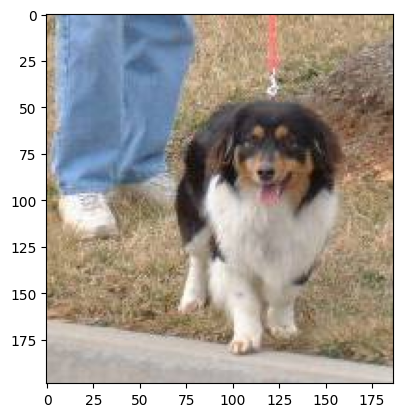

In [17]:
image_path = "/workspaces/deep/src/data/train/dogs/dog.2.jpg"
image = tf.keras.preprocessing.image.load_img(image_path)

plt.imshow(image)
plt.show()


In [18]:
# Crea carpetas
for folder in ["train/cats", "train/dogs", "test/cats", "test/dogs"]:
    os.makedirs(f"data/{folder}", exist_ok=True)

# Clasifica imágenes
images = os.listdir("/workspaces/deep/src/data/train")
cats = [img for img in images if img.startswith("cats")]
dogs = [img for img in images if img.startswith("dogs")]

In [19]:
# Crear generadores de datos
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

# Cargar imágenes desde el directorio
train_data = train_gen.flow_from_directory(
    "data/train",
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_gen.flow_from_directory(
    "data/test",
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical'
)
print(f"Imágenes de entrenamiento: {train_data.samples}")
print(f"Imágenes de prueba: {test_data.samples}")


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Imágenes de entrenamiento: 20000
Imágenes de prueba: 5000


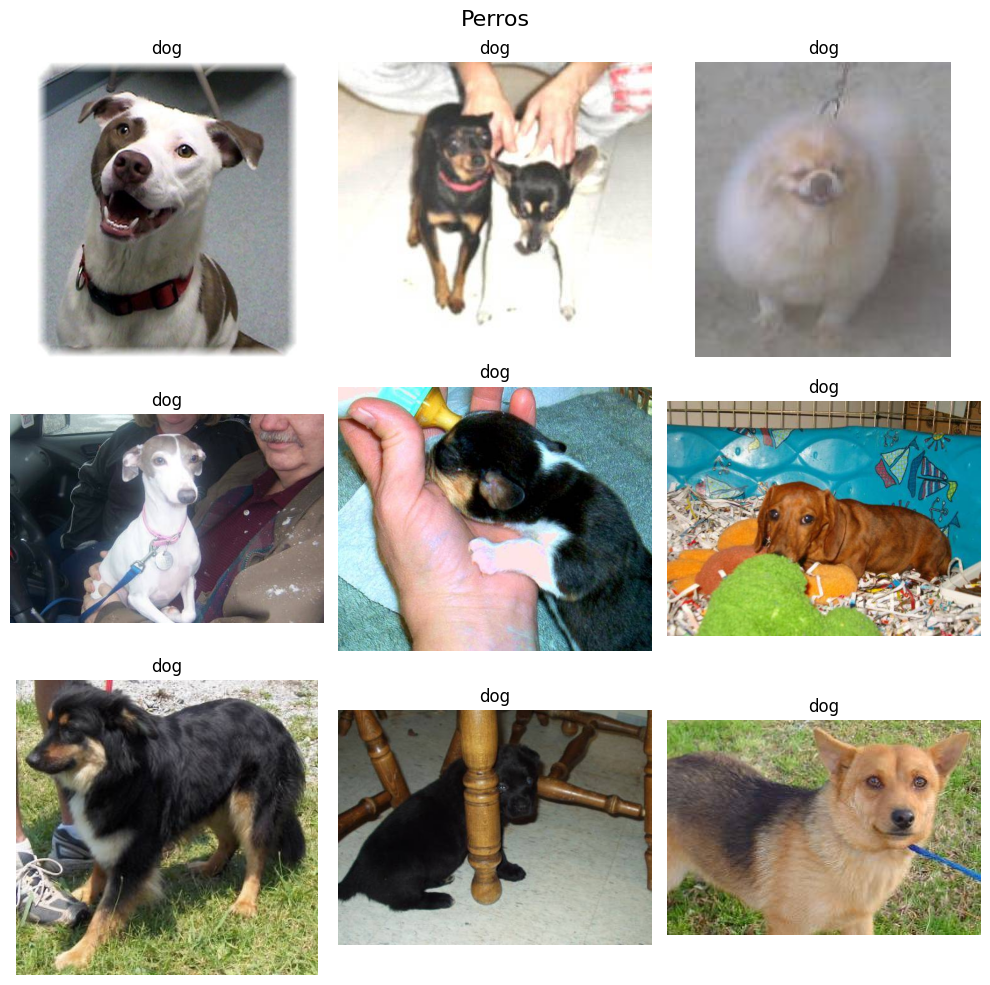

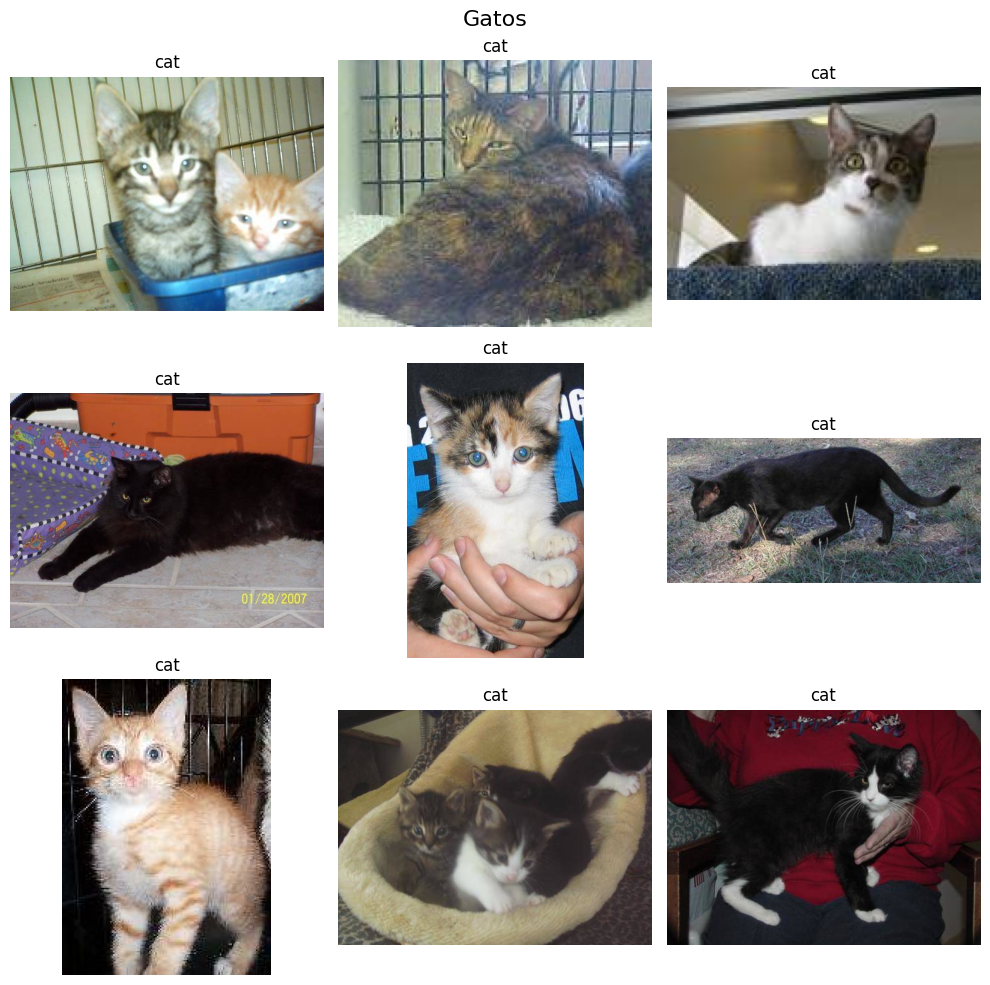

In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_images_from_folder(folder_path, title, n=9):
    files = os.listdir(folder_path)[:n]
    plt.figure(figsize=(10, 10))
    for i, file in enumerate(files):
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path)
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(file.split('.')[0])  # cat or dog
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Cambia estas rutas si tus carpetas están organizadas de otra forma
dog_folder = 'data/train/dogs'
cat_folder = 'data/train/cats'

# Mostrar imágenes
show_images_from_folder(dog_folder, "Perros")
show_images_from_folder(cat_folder, "Gatos")


In [21]:
# Modelo más ligero
model = Sequential([
    Input(shape=(96, 96, 3)),

    # Bloque 1
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Bloque 2
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Bloque 3
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Bloque 4
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), strides=(2, 2)),

    # Clasificación
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

# Compilación
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 96, 96, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 48, 48, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,210 (446.13 KB)

 Trainable params: 114,210 (446.13 KB)

 Non-trainable params: 0 (0.00 B)

El modelo contiene pocos parametros 114,210, lo cual por un lado es bueno para que sea rapido y eficiente ya que estamos trabajando en un entorno con recursos limitados.

Found 20000 files belonging to 2 classes.
Using 16000 files for training.


Found 20000 files belonging to 2 classes.
Using 4000 files for validation.
Epoch 1/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 52s 11ms/step - accuracy: 0.5600 - loss: 0.6813 - val_accuracy: 0.6470 - val_loss: 0.6317
Epoch 2/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6313 - loss: 0.6394 - val_accuracy: 0.6690 - val_loss: 0.6072
Epoch 3/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.6629 - loss: 0.6118 - val_accuracy: 0.6543 - val_loss: 0.6053
Epoch 4/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - accuracy: 0.6955 - loss: 0.5814 - val_accuracy: 0.7105 - val_loss: 0.5551
Epoch 5/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7109 - loss: 0.5576 - val_accuracy: 0.7157 - val_loss: 0.5570
Epoch 6/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.7285 - loss: 0.5365 - val_accuracy: 0.7420 - val_loss: 0.5207
Epoch 7/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.7357 - loss: 0.5203 - val_accuracy: 0.7640 - val_loss: 0.4933
Epoch 8

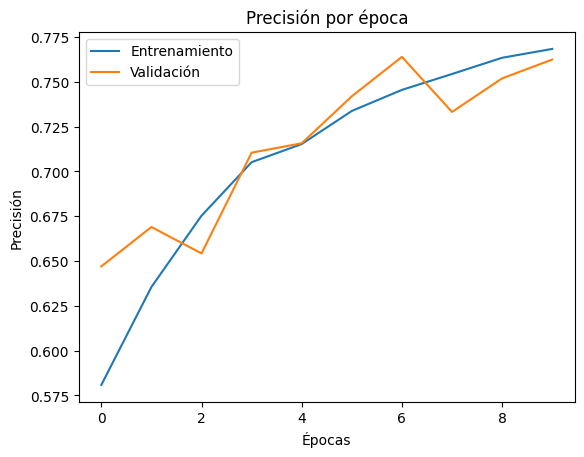

In [22]:
# Parámetros
img_height, img_width = 48, 48
batch_size = 4
epochs = 10
data_dir = pathlib.Path("data/train")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='binary',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=123
)

# Prefetch para rendimiento
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Modelo tipo VGG16
model = models.Sequential([
    layers.InputLayer(shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255),

    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
# Compilación
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

# Evaluación
loss, accuracy = model.evaluate(val_ds)
print(f'\nPrecisión en validación: {accuracy:.4f}')

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión por época')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()


En el entrenamiento la precision comienza en 0.600 y mejora cerca de los 0.775. Mientras que en la validacion la precision comienza en un nivel superior pero sigue una trayectoria similar, alcanzando el punto maximo de la epoca 6, para luego descender hasta la epoca 9.

In [23]:
# Guardar el mejor modelo
checkpoint_path = 'mi_modelo.keras'

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Entrenamiento de callbacks
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stop, model_checkpoint]
)

Epoch 1/10
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7754 - loss: 0.4743
Epoch 1: val_loss improved from inf to 0.51976, saving model to mi_modelo.keras
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7754 - loss: 0.4743 - val_accuracy: 0.7437 - val_loss: 0.5198
Epoch 2/10
3992/4000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7785 - loss: 0.4640
Epoch 2: val_loss improved from 0.51976 to 0.46452, saving model to mi_modelo.keras
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7785 - loss: 0.4640 - val_accuracy: 0.7745 - val_loss: 0.4645
Epoch 3/10
3989/4000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7880 - loss: 0.4490
Epoch 3: val_loss improved from 0.46452 to 0.46089, saving model to mi_modelo.keras
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7880 - loss: 0.4490 - val_accuracy: 0.7795 - val_loss: 0.4609
Epoch 4/10
3993/4000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7951 - loss: 0.4384
Epoch 4: val_loss improved from 0.46089 

   1/1000 ━━━━━━━━━━━━━━━━━━━━ 48s 49ms/step

2025-05-14 07:36:39.450064: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


 862/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Informe de Clasificación:
              precision    recall  f1-score   support

        Gato       0.78      0.79      0.79      1966
       Perro       0.79      0.79      0.79      2034

    accuracy                           0.79      4000
   macro avg       0.79      0.79      0.79      4000
weighted avg       0.79      0.79      0.79      4000



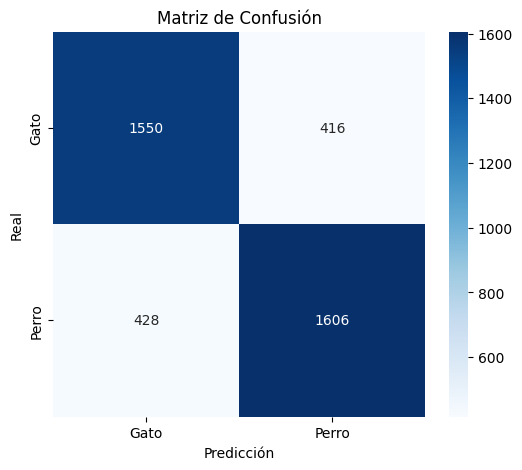

In [24]:
# Obtener etiquetas verdaderas del dataset de test
y_true = np.concatenate([y.numpy() for x, y in val_ds])
predicciones = model.predict(val_ds)
predicciones_binarias = (predicciones > 0.5).astype(int)
y_pred = predicciones_binarias.flatten()

# Reporte de clasificación
print("\nInforme de Clasificación:")
print(classification_report(y_true, y_pred, target_names=['Gato', 'Perro']))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Gato', 'Perro'], yticklabels=['Gato', 'Perro'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

Analisis del informe de clasificacion
-  Precisión: De todas las veces que predijo "Gato" o "Perro", el porcentaje correcto fue 76% para Gatos y 79% para Perros.

-  Recall: Indica que el 80% de los Gatos fueron detectados, pero en Perros bajó a 75%. Es decir que el modelo pierde algunas imágenes de Perros.

-  F1-score: Observamos que ambos están equilibrados cerca de 0.77.

La matriz de confusión confirma que el modelo confunde más imágenes de perros que de gatos.